# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     2.992088e+01     6.717884e+00
 * time: 0.0011718273162841797
     1     2.838113e+01     4.795998e+00
 * time: 0.004343986511230469
     2     1.983503e+01     3.847220e+00
 * time: 0.008697986602783203
     3     1.356813e+01     2.968240e+00
 * time: 0.013592958450317383
     4     1.099267e+01     1.289232e+00
 * time: 0.018466949462890625
     5     1.052369e+01     2.378595e+00
 * time: 0.021699905395507812
     6     9.957496e+00     1.317559e+00
 * time: 0.024860858917236328
     7     9.485128e+00     1.515376e+00
 * time: 0.02779388427734375
     8     8.986189e+00     1.288531e+00
 * time: 0.030598878860473633
     9     8.665691e+00     9.926520e-01
 * time: 0.03331398963928223
    10     8.494463e+00     7.233805e-01
 * time: 0.03604388236999512
    11     8.370012e+00     7.971162e-01
 * time: 0.038823843002319336
    12     8.221438e+00     6.812829e-01
 * time: 0.04165291786193848
    13     8.114508e+00     4.085223e-0

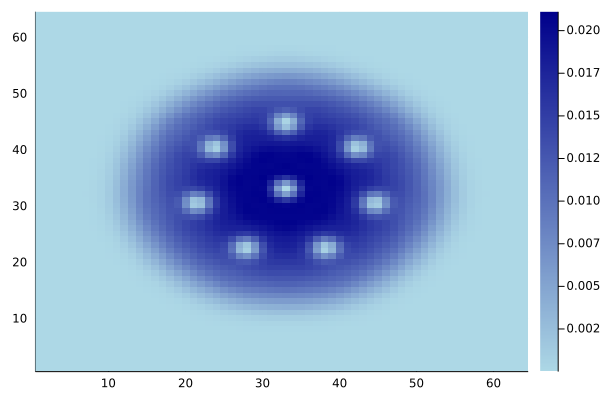

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)